<AxesSubplot:>

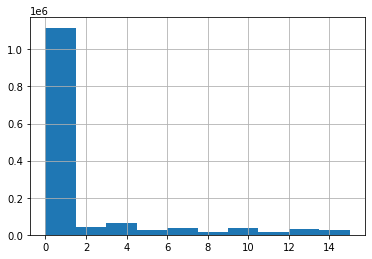

In [21]:
import pandas as pd
p = "D:\\bianmu_changguang\\JL1.csv"
df = pd.read_csv(p)
df.cloud_percent.hist()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1410484 entries, 0 to 1410483
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   product_id            1410484 non-null  object 
 1   imaging_time_str      1410484 non-null  object 
 2   satellite_id          1410484 non-null  object 
 3   sensor                1410484 non-null  object 
 4   roll_satellite_angle  1410484 non-null  float64
 5   image_gsd             1410484 non-null  float64
 6   cloud_percent         1410484 non-null  int64  
 7   lowerleft_latitude    1410484 non-null  float64
 8   lowerleft_longitude   1410484 non-null  float64
 9   upperleft_latitude    1410484 non-null  float64
 10  upperleft_longitude   1410484 non-null  float64
 11  lowerright_latitude   1410484 non-null  float64
 12  lowerright_longitude  1410484 non-null  float64
 13  upperright_latitude   1410484 non-null  float64
 14  upperright_longitude  1410484 non-

In [1]:
#%%
import pandas as pd
import numpy as np
import io

csv = '''
breed,type,longevity,size,weight
German Shepherd,herding,9.73,large,
Beagle,hound,12.3,small,
Yorkshire Terrier,toy,12.6,small,5.5
Golden Retriever,sporting,12.04,medium,60.0
Bulldog,non-sporting,6.29,medium,45.0
Labrador Retriever,sporting,12.04,medium,67.5
Boxer,working,8.81,medium,
Poodle,non-sporting,11.95,medium,
Dachshund,hound,12.63,small,24.0
Rottweiler,working,9.11,large,
Boston Terrier,non-sporting,10.92,medium,
Shih Tzu,toy,13.2,small,12.5
Miniature Schnauzer,terrier,11.81,small,15.5
Doberman Pinscher,working,10.33,large,
Chihuahua,toy,16.5,small,5.5
Siberian Husky,working,12.58,medium,47.5
Pomeranian,toy,9.67,small,5.0
French Bulldog,non-sporting,9.0,medium,27.0
Great Dane,working,6.96,large,
Shetland Sheepdog,herding,12.53,small,22.0
Cavalier King Charles Spaniel,toy,11.29,small,15.5
German Shorthaired Pointer,sporting,11.46,large,62.5
Maltese,toy,12.25,small,5.0
'''

dogs = pd.read_csv(io.StringIO(csv))

(dogs[dogs['size'] == 'medium']
 .sort_values('type')
 .groupby('type').median()
)
# %%
print(dogs)
# %%


                            breed          type  longevity    size  weight
0                 German Shepherd       herding       9.73   large     NaN
1                          Beagle         hound      12.30   small     NaN
2               Yorkshire Terrier           toy      12.60   small     5.5
3                Golden Retriever      sporting      12.04  medium    60.0
4                         Bulldog  non-sporting       6.29  medium    45.0
5              Labrador Retriever      sporting      12.04  medium    67.5
6                           Boxer       working       8.81  medium     NaN
7                          Poodle  non-sporting      11.95  medium     NaN
8                       Dachshund         hound      12.63   small    24.0
9                      Rottweiler       working       9.11   large     NaN
10                 Boston Terrier  non-sporting      10.92  medium     NaN
11                       Shih Tzu           toy      13.20   small    12.5
12            Miniature S

In [5]:
dogs[dogs["size"] == "small" ]

,breed,type,longevity,size,weight
1,Beagle,hound,12.30,small,NaN
2,Yorkshire Terrier,toy,12.60,small,5.5
8,Dachshund,hound,12.63,small,24.0
11,Shih Tzu,toy,13.20,small,12.5
12,Miniature Schnauzer,terrier,11.81,small,15.5
14,Chihuahua,toy,16.50,small,5.5
16,Pomeranian,toy,9.67,small,5.0
19,Shetland Sheepdog,herding,12.53,small,22.0
20,Cavalier King Charles Spaniel,toy,11.29,small,15.5
22,Maltese,toy,12.25,small,5.0


In [20]:
dogs[["type", "longevity"]].groupby("type").transform( lambda x : (x-x.mean())/x.std())

,longevity
0,-0.707107
1,-0.707107
2,0.006579
3,0.577350
4,-1.306405
5,0.577350
6,-0.360317
7,0.968749
8,0.707107
9,-0.215805


In [15]:
dogs.groupby("type").get_group("hound")
groups = dogs.groupby("type")

In [9]:
# groupby=splitting + Applying(Aggregation/Transform/Filgeration) + Combining

# Aggregation = mean, sum, size, count, std, var, sem, describe, first, last, nth, min, max
# g.agg()
# transform, filter

In [26]:
dff = pd.DataFrame({"A": np.arange(8), "B": list("aabbbbcc")})
print(dff)
dff.groupby("B").filter(lambda x: len(x) > 2)

   A  B
0  0  a
1  1  a
2  2  b
3  3  b
4  4  b
5  5  b
6  6  c
7  7  c


,A,B
2,2,b
3,3,b
4,4,b
5,5,b


In [10]:
def get_letter_type(letter):
    if letter.lower() in 'aeiou':
        return 'vowel'
    else:
        return 'consonant'

grouped = dogs.groupby(get_letter_type, axis=1)

In [16]:

groups.aggregate(np.sum)

,longevity,weight
type,,
herding,22.26,22.0
hound,24.93,24.0
non-sporting,38.16,72.0
sporting,35.54,190.0
terrier,11.81,15.5
toy,75.51,49.0
working,47.79,47.5
